In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

## National Statistics

### total number of cases over time

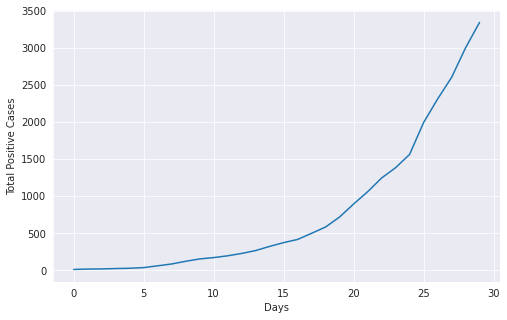

In [46]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

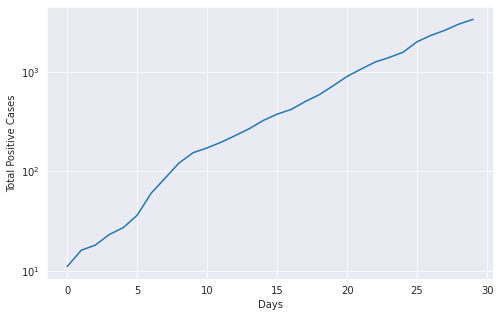

In [47]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

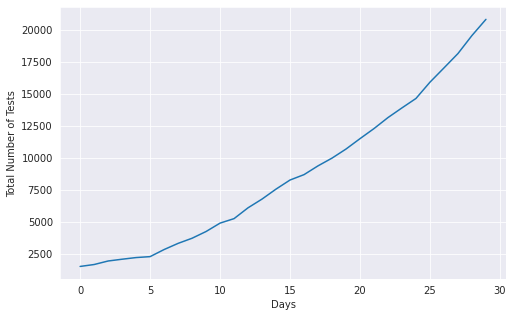

In [48]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [49]:
num_test_per_day = df_total['Total Tests'].diff().fillna(0) + df_total['Total Tests'][0]

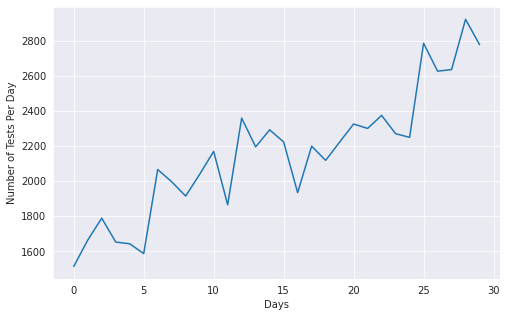

In [50]:
num_test_per_day.plot(figsize=(8, 5))
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

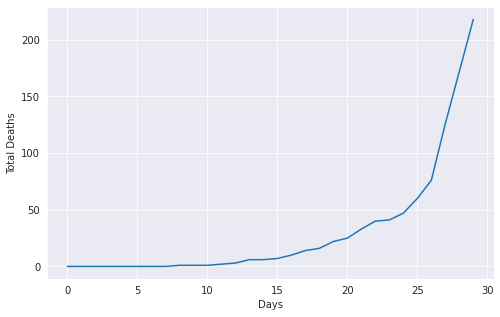

In [51]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

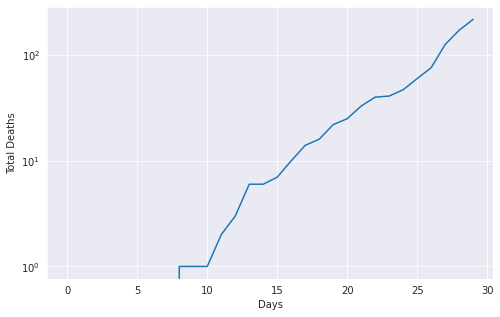

In [52]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

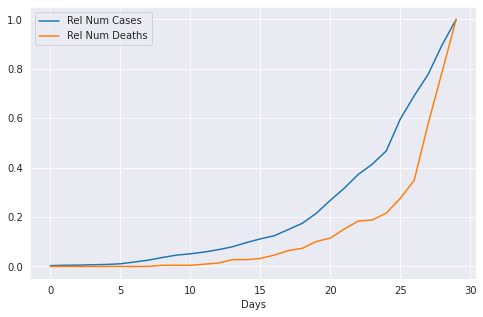

In [53]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

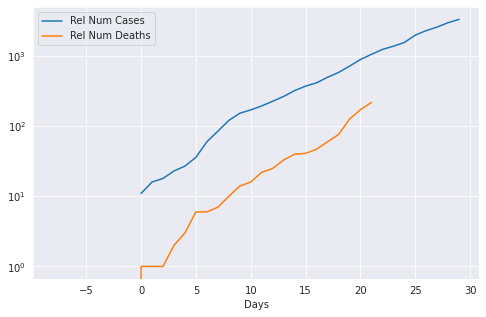

In [54]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 8

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 8-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day percentage rise in cases?

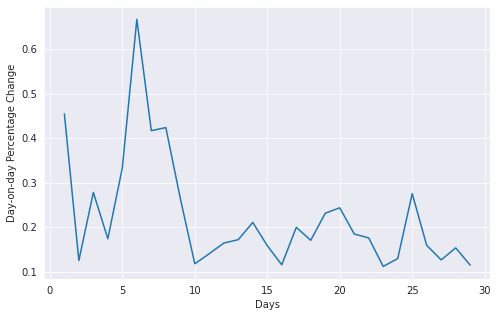

In [55]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

In [56]:
df_total['Total Positive Cases'].pct_change()[-7:]

23    0.111647
24    0.129335
25    0.275112
26    0.159057
27    0.126407
28    0.153344
29    0.114628
Name: Total Positive Cases, dtype: float64

In [57]:
df_total['Total Positive Cases'].pct_change().describe()

count    29.000000
mean      0.223729
std       0.127958
min       0.111647
25%       0.140351
50%       0.173913
75%       0.264463
max       0.666667
Name: Total Positive Cases, dtype: float64

### What is the day-on-day percentage rise in deaths?

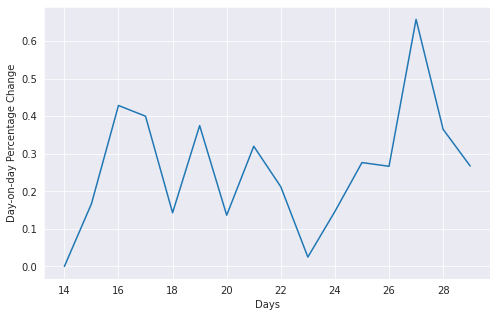

In [58]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

In [59]:
death_pct_change[-7:]

23    0.025000
24    0.146341
25    0.276596
26    0.266667
27    0.657895
28    0.365079
29    0.267442
Name: Total Deaths, dtype: float64

In [60]:
death_pct_change.describe()

count    16.000000
mean      0.261662
std       0.165386
min       0.000000
25%       0.145470
50%       0.267054
75%       0.367560
max       0.657895
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

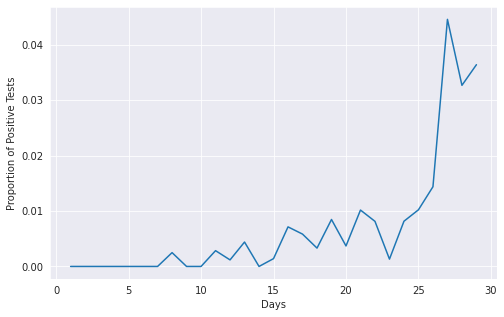

In [61]:
prop_pos = (df_total['Total Deaths'].diff() / df_total['Total Tests'].diff()).dropna()

prop_pos.plot(figsize=(8, 5))
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

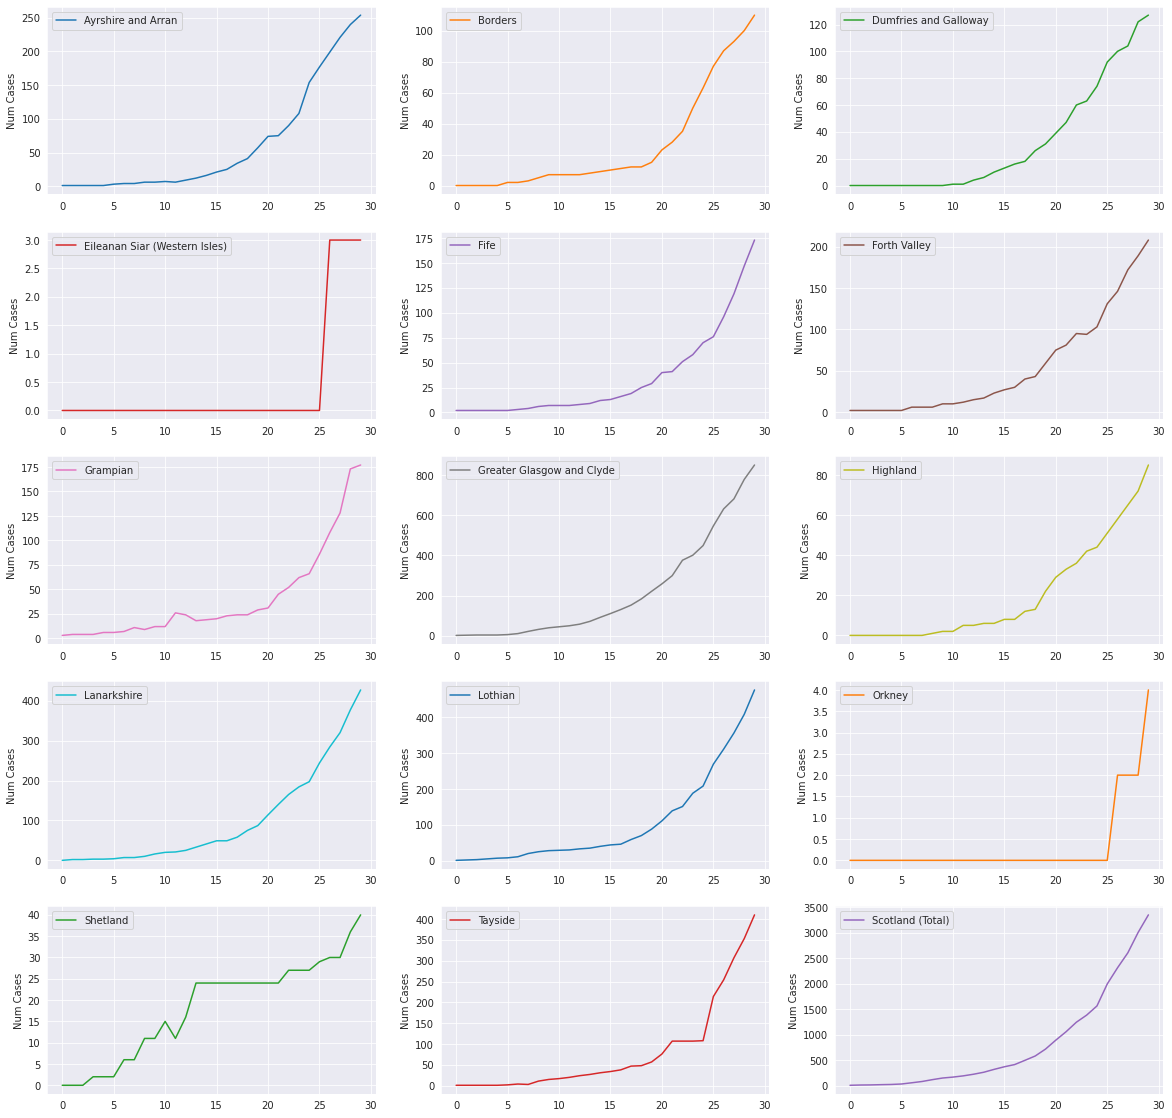

In [62]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

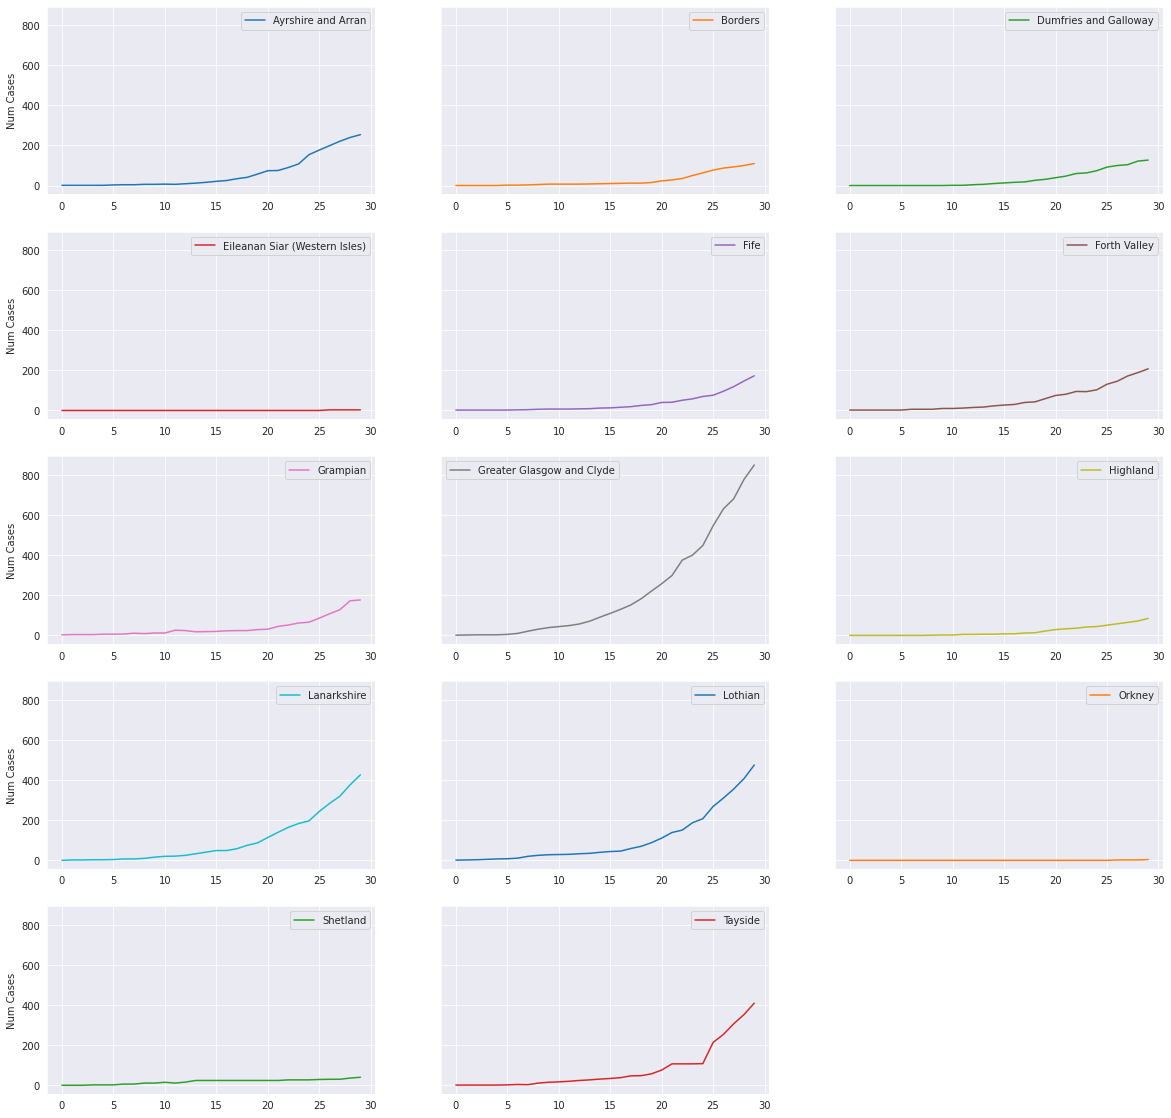

In [63]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [64]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [65]:
df_cases_rel = df_cases / df_pop.values.T

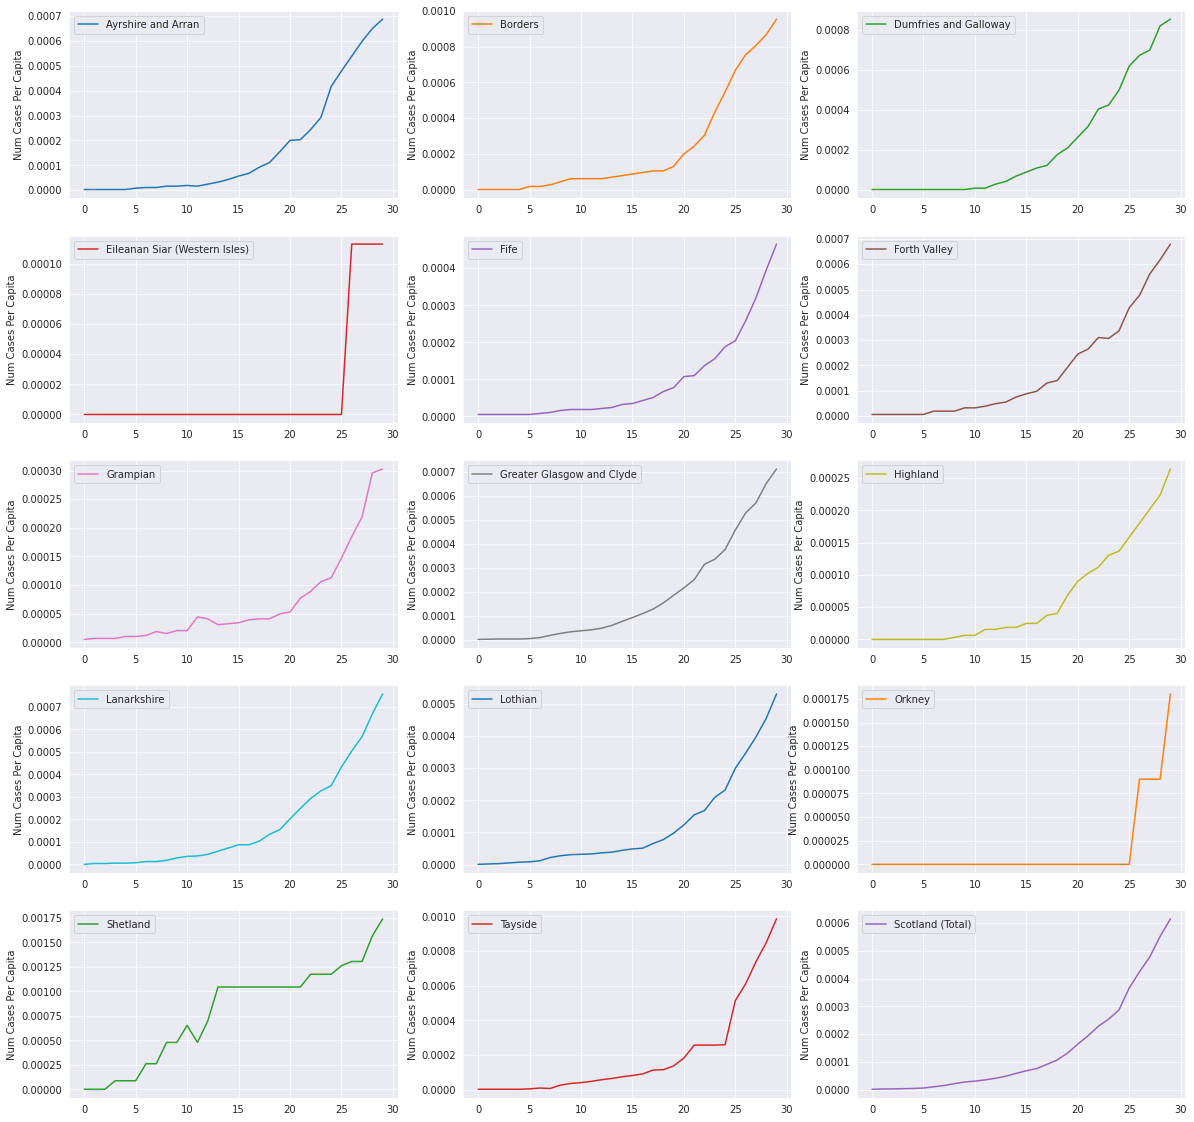

In [66]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

- Same again but sharing the y axis for comparison

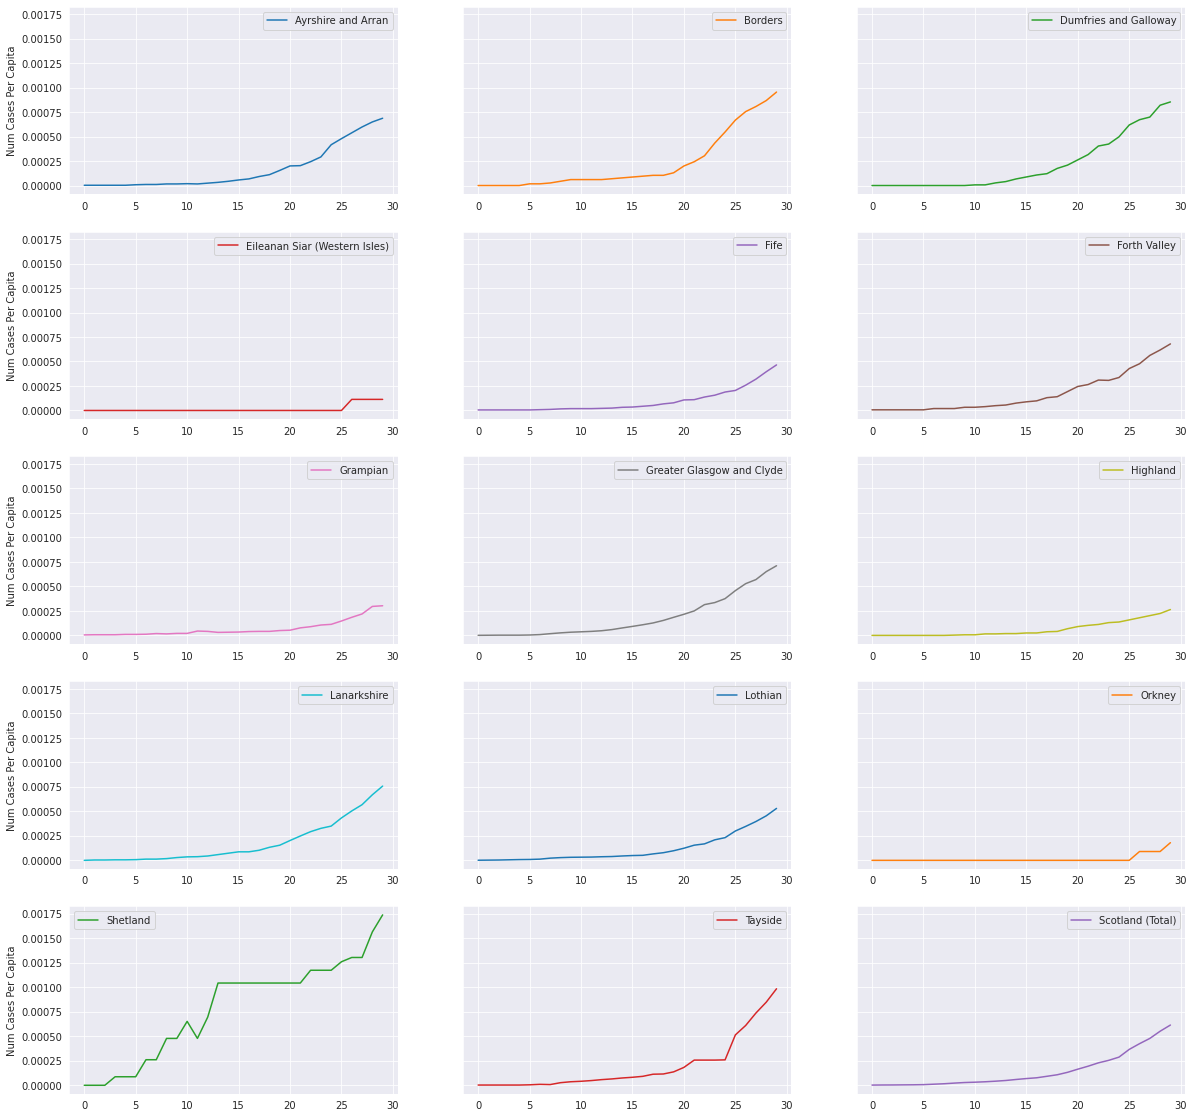

In [67]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

### Log Growth Curves for Each Region

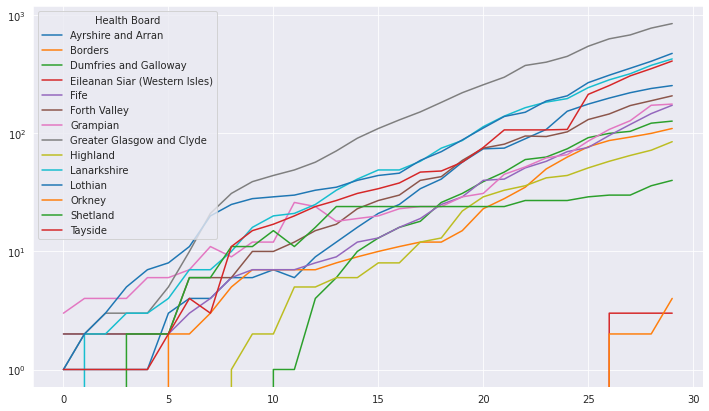

In [68]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

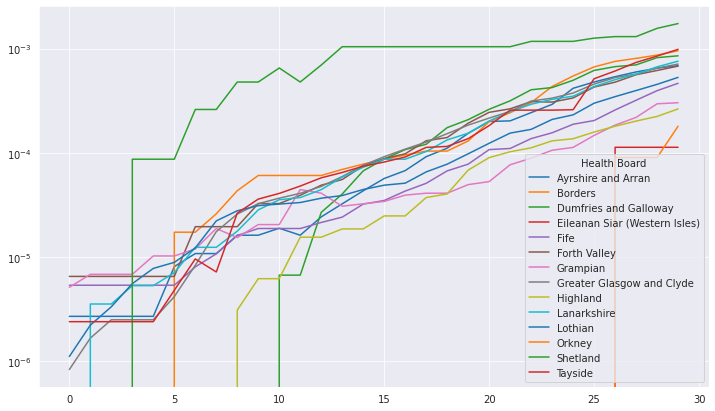

In [69]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()